# TDE 1 - Análise Multivariada

Gabriela Dellamora, Leonardo Ripes e Luize Iensse

## Imports e Configurações

In [1]:
# python 3.10.11

import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

import itertools

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# Questão 1

#### (a) Encontrar k para que f(r) seja uma fdp

Valor de k: 2


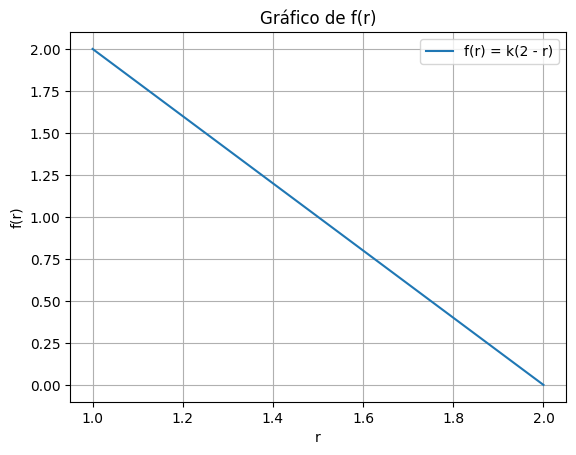

In [4]:
r = sp.Symbol('r')
k = sp.Symbol('k')

f_r = k * (2 - r)
integral_f_r = sp.integrate(f_r, (r, 1, 2))
k_value = sp.solve(integral_f_r - 1, k)[0]
print(f'Valor de k: {k_value}')
f_r = 2 * (2 - r)

# Plotting f(r)
r_vals = np.linspace(1, 2, 100)
f_r_vals = [k_value * (2 - r_val) for r_val in r_vals]
plt.plot(r_vals, f_r_vals, label='f(r) = k(2 - r)')
plt.xlabel('r')
plt.ylabel('f(r)')
plt.title('Gráfico de f(r)')
plt.legend()
plt.grid(True)
plt.show()

#### (b) fdp do volume da esfera V = (4/3)πR^3

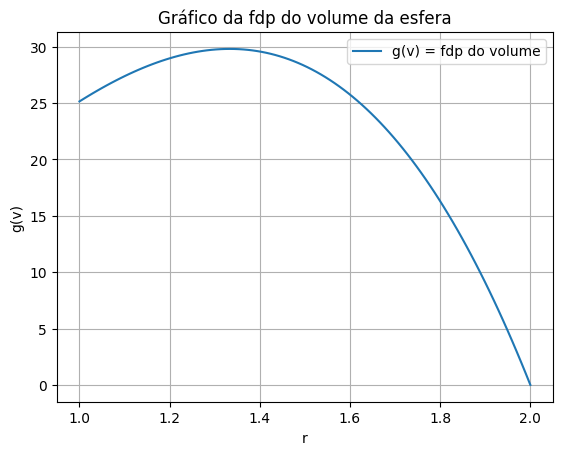

In [5]:
V = (4/3) * sp.pi * r**3
g_v = sp.diff(V, r) * f_r
g_v_simplified = g_v.subs(k, k_value)

# Plotting g(v)
r_vals = np.linspace(1, 2, 100)
g_v_vals = [g_v_simplified.subs(r, r_val).evalf() for r_val in r_vals]
plt.plot(r_vals, g_v_vals, label='g(v) = fdp do volume')
plt.xlabel('r')
plt.ylabel('g(v)')
plt.title('Gráfico da fdp do volume da esfera')
plt.legend()
plt.grid(True)
plt.show()

#### (c) Calcular Pr(V < 5π)

In [6]:
V_max = (4/3) * sp.pi * r**3
prob_v_less_5pi = sp.integrate(f_r, (r, 1, ((5 * sp.pi) / ((4 / 3) * sp.pi)) ** (1/3)))

print(f'Probabilidade de V < 5π: {prob_v_less_5pi.evalf()}')

Probabilidade de V < 5π: 0.800741550393643


# Questão 2

#### (a) Espaço amostral

In [12]:
bolinhas = [1, 2, 3, 4, 5]
combinacoes = list(itertools.combinations(bolinhas, 2))

print(f'Espaço amostral:\n {combinacoes}')

Espaço amostral:
 [(1, 2), (1, 3), (1, 4), (1, 5), (2, 3), (2, 4), (2, 5), (3, 4), (3, 5), (4, 5)]


#### (b) Definir contradomínios

In [13]:
X1 = [sum(c) for c in combinacoes]
X2 = [min(c) for c in combinacoes]
X3 = [max(c) for c in combinacoes]
X4 = [c[0]**2 + c[1]**2 for c in combinacoes]

print(f'Contradomínio X1 (soma dos pontos):\n {X1}')
print(f'Contradomínio X2 (mínimo dos pontos):\n {X2}')
print(f'Contradomínio X3 (máximo dos pontos):\n {X3}')
print(f'Contradomínio X4 (soma dos quadrados):\n {X4}')

Contradomínio X1 (soma dos pontos):
 [3, 4, 5, 6, 5, 6, 7, 7, 8, 9]
Contradomínio X2 (mínimo dos pontos):
 [1, 1, 1, 1, 2, 2, 2, 3, 3, 4]
Contradomínio X3 (máximo dos pontos):
 [2, 3, 4, 5, 3, 4, 5, 4, 5, 5]
Contradomínio X4 (soma dos quadrados):
 [5, 10, 17, 26, 13, 20, 29, 25, 34, 41]


#### (c) Matriz X (n=10, p=4)

In [14]:
X = np.array([X1, X2, X3, X4]).T
print(f'Matriz X:\n {X}')

Matriz X:
 [[ 3  1  2  5]
 [ 4  1  3 10]
 [ 5  1  4 17]
 [ 6  1  5 26]
 [ 5  2  3 13]
 [ 6  2  4 20]
 [ 7  2  5 29]
 [ 7  3  4 25]
 [ 8  3  5 34]
 [ 9  4  5 41]]


#### (d) Pr(X1 > 4)

In [15]:
prob_X1_greater_4 = sum(1 for x in X1 if x > 4) / len(X1)
print(f'Pr(X1 > 4): {prob_X1_greater_4}')

Pr(X1 > 4): 0.8


#### (e) Pr(X1 ≤ 6, X2 = 1, X3 ≤ 3)

In [16]:
count_conditional = sum(1 for i in range(len(combinacoes)) if X1[i] <= 6 and X2[i] == 1 and X3[i] <= 3)
prob_conditional = count_conditional / len(X1)
print(f'Pr(X1 ≤ 6, X2 = 1, X3 ≤ 3): {prob_conditional}')

Pr(X1 ≤ 6, X2 = 1, X3 ≤ 3): 0.2


#### (f) Pr(X4 ser múltiplo de 5)

In [17]:
count_X4_multiple_5 = sum(1 for x in X4 if x % 5 == 0)
prob_X4_multiple_5 = count_X4_multiple_5 / len(X4)
print(f'Pr(X4 ser múltiplo de 5): {prob_X4_multiple_5}')

Pr(X4 ser múltiplo de 5): 0.4


# Questão 3

In [18]:
# fdp conjunta
x, y = sp.symbols('x y')
f_xy = (3/7) * (x + (x * y**2) / 2)

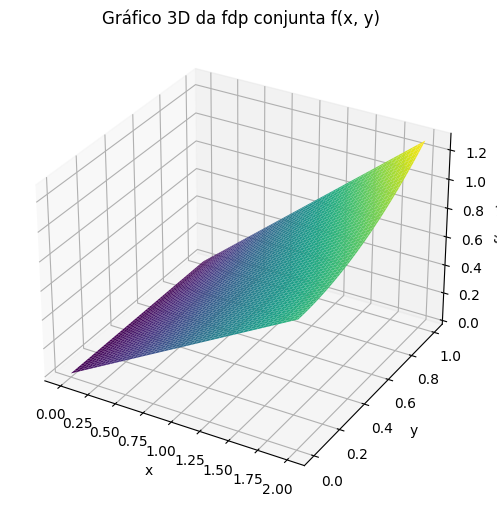

In [19]:
# Plotagem para verificação visual
f_xy_lamb = sp.lambdify([x, y], f_xy, "numpy")


# Plotting fdp
x_vals = np.linspace(0, 2, 100)
y_vals = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f_xy_lamb(X, Y)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
ax.set_title('Gráfico 3D da fdp conjunta f(x, y)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
plt.show()

def rotate(angle):
    ax.view_init(elev=30, azim=angle)
ani = FuncAnimation(fig, rotate, frames=np.arange(0, 360, 2), interval=100)
ani.save('grafico_animado.gif', writer='pillow')

#### (a) Pr(X < Y)

In [20]:
prob_X_less_Y = sp.integrate(sp.integrate(f_xy, (x, 0, y)), (y, 0, 1))
print(f'Pr(X < Y): {prob_X_less_Y.evalf()}')

Pr(X < Y): 0.0928571428571429


#### (b) Pr(Y < 0.5 | X < 0.5)

In [21]:
prob_Y_less_05_given_X_less_05 = sp.integrate(sp.integrate(f_xy, (y, 0, 0.5)), (x, 0, 0.5)) / sp.integrate(f_xy, (x, 0, 0.5), (y, 0, 1))
print(f'Pr(Y < 0.5 | X < 0.5): {prob_Y_less_05_given_X_less_05.evalf()}')

Pr(Y < 0.5 | X < 0.5): 0.446428571428571


#### (c) Verificar independência entre X e Y

In [23]:
f_x = sp.integrate(f_xy, (y, 0, 1))
f_y = sp.integrate(f_xy, (x, 0, 2))
f_x_times_f_y = f_x * f_y
# f(x) * f(y) = f(x, y)?
independence = sp.simplify(f_x_times_f_y - f_xy)
print(f'X e Y são independentes? {"Sim" if independence == 0 else "Não"}')

X e Y são independentes? Sim
